# Montreal Metro Incidents

<img src="https://www.stm.info/sites/default/files/planmetro/map-interactive.png" width=700/>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

## Data

### Reading data

The method [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from [`pandas`](https://pandas.pydata.org/) can be used to read CSV files into a dataFrame

In [2]:
df = pd.read_csv("Metro.csv")

[`dataFrames`](https://pandas.pydata.org/docs/reference/api/pandas.dataFrame.html) offer a rich collection of methods to manipulate data. The method [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.dataFrame.head.html) is useful to have a quick look at a dataFrame.

In [3]:
df.head()

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,2:56,3:32,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,2:56,3:42,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,3:35,4:41,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,4:56,5:36,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,5:25,5:54,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01


### Cleaning

Usually always some cleaning of the data will be needed. In our case, the dataset requires only minimal cleaning. <br>
First we drop columns we don't need.<br>
The `dataFrame` method [`drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.dataFrame.drop.html) can be used for this.

In [4]:
# Dropping columns we will not need
df = df.drop('Numéro de tournée', axis=1)
df = df.drop("Numero d'incident", axis=1)
df = df.drop("Incident en minutes", axis=1)
df = df.drop("Évacuation", axis=1)
df = df.drop("Urgence métro", axis=1)
df = df.drop("Année civile/mois", axis=1)
df = df.drop("Jour calendaire", axis=1)

In [5]:
# Display modified dataFrame
df.head()

,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
0,S,Autres,Autres,Clientèle,Ligne orange,2:56,3:32,#,#,Non affecté,Snowdon,0,0,0,0,2019,1,1,2
1,S,Autres,Autres,Clientèle,Ligne orange,2:56,3:42,#,#,Non affecté,Snowdon,0,0,0,0,2019,1,1,2
2,S,Autres,Autres,Clientèle,Ligne verte,3:35,4:41,#,#,Non affecté,Place-des-Arts,0,0,0,0,2019,1,1,2
3,S,Autres,Autres,Clientèle,Ligne verte,4:56,5:36,#,#,Non affecté,Lionel-Groulx,0,0,0,0,2019,1,1,2
4,S,Autres,Autres,Clientèle,Ligne verte,5:25,5:54,#,#,Non affecté,Berri-UQAM,0,0,0,0,2019,1,1,2


Sometimes a dataset can contain errors. In our case we have some strange entries in the `Ligne` field

In [6]:
df.Ligne.unique()

array(['Ligne orange', 'Ligne verte', 'Ligne bleue', 'Ligne jaune',
       'Ligne 1, 2, 4, 5', 'Non affecté', 'Ligne 1, 2, 4', 'Ligne 1, 2',
       'Ligne 2, 1', 'Ligne 2, 1, 4', 'Ligne 2, 5', 'Ligne 5, 2',
       'Ligne 2, 4', '05-Jan', '2004-02-01', '2004-01-02', '2002-01-05'],
      dtype=object)

In [7]:
# Example
df[df.Ligne=='2004-02-01']

,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
24215,T,Clientèle,Méfait volontaire,"Feu, fumée, odeur, produit, etc...",2004-02-01,8:12,8:56,#,#,Non affecté,L214,0,0,0,1,2019,1,9,3
24321,T,Équipements fixes,Service aux trains,"Feu, fumée, odeur, produit, etc...",2004-02-01,19:55,22:25,#,#,Non affecté,L214,0,0,0,1,2021,1,21,4


We remove these wrong entries from our dataset<br>
We remove as well the entries which did not affect any metro line as we are not interested in them for our example.

In [8]:
# Remove erroneous entries
df.drop(df[df.Ligne=='05-Jan'].index, inplace=True)
df.drop(df[df.Ligne=='2004-02-01'].index, inplace=True)
df.drop(df[df.Ligne=='2004-01-02'].index, inplace=True)
df.drop(df[df.Ligne=='2002-01-05'].index, inplace=True)

# Remove incidents which did not affect any metro line
df.drop(df[df.Ligne=='Non affecté'].index, inplace=True)

In this exercise we want only to look at the events which affects the service of the trains (i.e. which create an interruption of the train service).
These are only the events of type 'T'.

Consequently we remove all events of type 'S' (to keep only the 'T' events).

In [9]:
df = df.drop(df[df["Type d'incident"] == 'S'].index)
# Now we can remove the column as it is no longer usefull
df = df.drop("Type d'incident", axis=1)

### Processing

To simplify the exploration and manipulation of the dataset, we will convert the various time fields into something simpler to manipulate.<br>
Manipulating times and dates is usually cumbersome. Python offers various libraries to help in this. In this notebook, we will use the methods built into `pandas`.

We use the `pandas` method [`to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert times encoded as strings to [`datatime`](https://docs.python.org/3/library/datetime.html#datetime-objects) objects. <br>
The method will return a [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of [`datatime`](https://docs.python.org/3/library/datetime.html#datetime-objects) objects.

In [10]:
# Convert the times to datatime objects
# Problem: as sometimes the format is not consistent (sometimes it has the format HH:MM:SS) this will raise errors
#          We use the option errors='coerce' to ignore errors and isnted fill the dataFrame field with NaT
t1 = pd.to_datetime(df["Heure de l'incident"], format='%H:%M', errors='coerce')
t2 = pd.to_datetime(df['Heure de reprise'], format='%H:%M', errors='coerce')

It will be simpler for us to use fraction of hours since midnight rather than datatime objects. We can use the [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) method from a `pandas.Series` object to extract this information.<br>
The [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) requires as argument a function that will be applied to each element of the `pandas.Series`.<br>
As in our case the function is simple, we use a [`lambda`](https://www.w3schools.com/python/python_lambda.asp) function to that (we could as well use an explictly defined function if we wish).

In [11]:
# convert start and end time in fraction of hours since midnight
df["Heure de l'incident"] = t1.apply(lambda x: (x.hour + x.minute / 60 ))
df['Heure de reprise'] = t2.apply(lambda x: (x.hour + x.minute / 60 ))

In [12]:
# compute duration of interuption in minutes and add one column to dataFrame
df['duration'] = (df['Heure de reprise']-df["Heure de l'incident"]) * 60

# Alternative way using datetime functions:
# df['duration']  = (t2-t1)/np.timedelta64(1, 'm')

In [13]:
df.head()

,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
8621,Autres,Causes externes,"Feu, fumée, odeur, produit, etc...",Ligne verte,2.466667,2.466667,#,#,Non affecté,Berri-UQAM,0,0,0,0,2019,1,1,2,0.0
8622,Clientèle,Méfait volontaire,Clientèle,Ligne verte,2.616667,2.616667,#,#,Non affecté,Place-des-Arts,0,0,0,1,2019,1,1,2,0.0
8623,Clientèle,Méfait volontaire,Clientèle,Ligne verte,9.400000,9.400000,#,#,Non affecté,Charlevoix,0,0,0,1,2019,1,1,2,0.0
8624,Équipements fixes,Service aux trains,Équipements fixes,Ligne orange,9.666667,9.666667,#,#,Non affecté,Montmorency,0,0,0,0,2019,1,1,2,0.0
8625,Clientèle,Méfait volontaire,Clientèle,Ligne verte,15.650000,15.650000,#,#,Non affecté,Pie-IX,0,0,0,0,2019,1,1,2,0.0


## Data exploration

### General

In [14]:
df.describe()

,Heure de l'incident,Heure de reprise,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
count,15217.000000,15187.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15187.000000
mean,13.613269,13.662231,0.012431,0.034566,0.116446,0.242659,2020.339570,6.079026,15.715228,3.817023,4.103575
std,5.231898,5.223484,0.110803,0.182683,0.320769,0.428704,1.142291,3.417645,8.761826,1.931615,12.385863
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,1.000000,0.000000
25%,8.950000,9.016667,0.000000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000,2.000000,0.000000
50%,13.450000,13.516667,0.000000,0.000000,0.000000,0.000000,2020.000000,6.000000,16.000000,4.000000,2.000000
75%,17.700000,17.750000,0.000000,0.000000,0.000000,0.000000,2021.000000,9.000000,23.000000,5.000000,4.000000
max,23.983333,23.983333,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,7.000000,547.000000


It is a common task in data analysis to aggregate data according some fields. In this section we want to look into our data aggregated per year. Let us first look which years are in our dataset.

### Incidents per year

#### Years covered by data

In [15]:
df["Année civile"].unique()

array([2019, 2020, 2021, 2022])

#### Aggregation of data per year

To aggregate our data per year, we use the `dataFrame` method [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.dataFrame.groupby.html).<br>
This method returns a [`GroupBy`](https://pandas.pydata.org/docs/reference/groupby.html) object. This object contains several methods that can be used to perform operations of the aggregated data. For example computing the mean value or counting them.<br>
In our case we are interested in the number of incidents per year. So we use the [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.count.html#pandas.core.groupby.GroupBy.count) method.

In [16]:
df.groupby("Année civile").count()

,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Mois calendrier,Jour du mois,Jour de la semaine,duration
Année civile,,,,,,,,,,,,,,,,,,
2019,5076,5076,5076,5076,4930,4923,5076,5076,5076,5076,5076,5076,5076,5076,5076,5076,5076,4923
2020,3703,3703,3703,3703,3566,3559,3703,3703,3703,3703,3703,3703,3703,3703,3703,3703,3703,3559
2021,3546,3546,3546,3546,3425,3418,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3418
2022,3442,3442,3442,3442,3296,3287,3442,3442,3442,3442,3442,3442,3442,3442,3442,3442,3442,3287


Note that each columns contain the same number of entries (some may have less, in case some fields are missing in that column). We can choose any of them to use as the number of incidents that did happen in a given year.<br>
In our case we choose the field `duration`. Using the `dataFrame` [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.dataFrame.plot.html) method, with the parameter `kind='bar'`, we can obtain a histogram of our data.

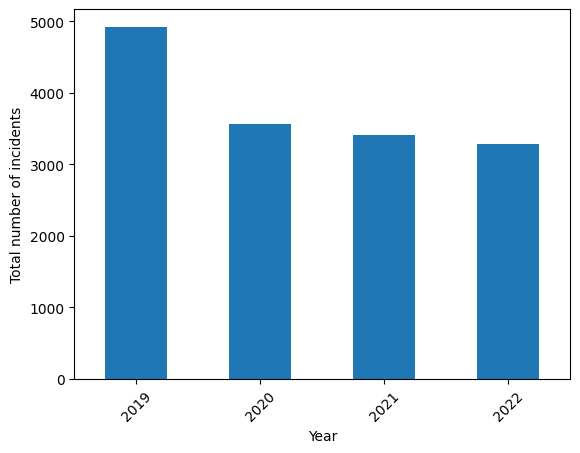

In [17]:
incidents = df.groupby("Année civile").count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel("Total number of incidents")
plt.xticks(rotation=45)
plt.show()

It is as well possible to aggregate by more than one field. For example we can aggregate per year and month within this year.

In [18]:
df.groupby(["Année civile", "Mois calendrier"]).count()

Cause primaire  Cause secondaire  Symptome  \
Année civile Mois calendrier                                               
2019         1                           413               413       413   
             2                           416               416       416   
             3                           482               482       482   
             4                           410               410       410   
             5                           376               376       376   
             6                           454               454       454   
             7                           408               408       408   
             8                           365               365       365   
             9                           427               427       427   
             10                          439               439       439   
             11                          445               445       445   
             12                          441               441       441   
2020         1                           433               433       433   
             2                           440               440       440   
             3                           450               450       450   
             4                           261               261       261   
             5                           298               298       298   
             6                           278               278       278   
             7                           290               290       290   
             8                           239               239       239   
             9                           215               215       215   
             10                          259               259       259   
             11                          253               253       253   
             12                          287               287       287   
2021         1                           325               325       325   
             2                           298               298       298   
             3                           290               290       290   
             4                           287               287       287   
             5                           284               284       284   
             6                           349               349       349   
             7                           268               268       268   
             8                           323               323       323   
             9                           268               268       268   
             10                          238               238       238   
             11                          290               290       290   
             12                          326               326       326   
2022         1                           358               358       358   
             2                           386               386       386   
             3                           393               393       393   
             4                           355               355       355   
             5                           324               324       324   
             6                           344               344       344   
             7                           312               312       312   
             8                           311               311       311   
             9                           324               324       324   
             10                          335               335       335   

                              Ligne  Heure de l'incident  Heure de reprise  \
Année civile Mois calendrier                                                 
2019         1                  413                  399               399   
             2                  416                  406               406   
             3                  482                  468             

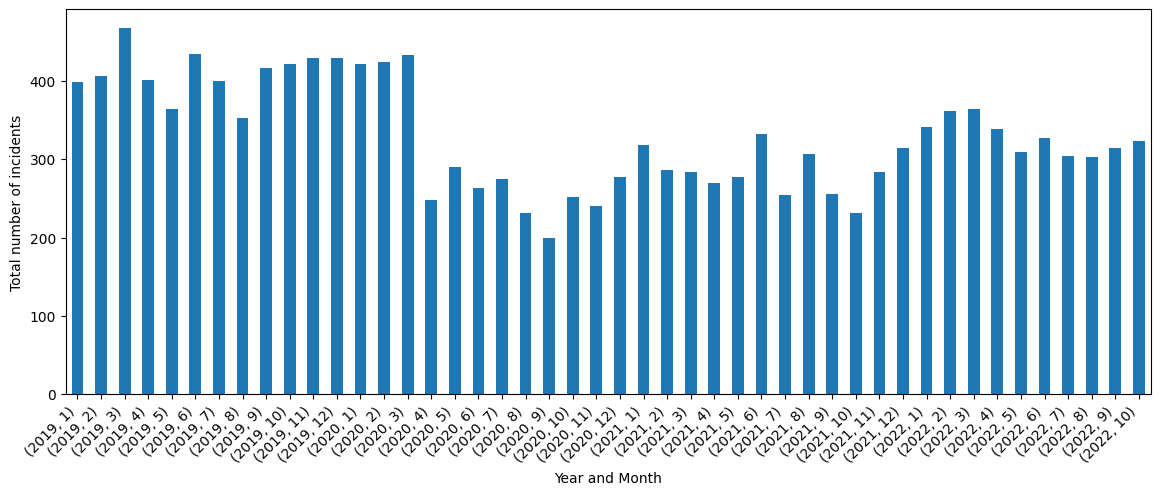

In [19]:
# A fugure is always better than a huge table
incidents = df.groupby(["Année civile", "Mois calendrier"]).count()['duration']
incidents.plot(kind='bar', figsize=(14,5))
plt.xlabel('Year and Month')
plt.ylabel("Total number of incidents")
plt.xticks(rotation=45, ha='right')
plt.show()

Note: one can see how pandemic has affected these data (see [here](https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_Quebec) for timeline of measures in Quebec). Starting from March 2020 less incidents are reproted as less passengers where using the metro.

### Effect of COVID19 restrictions on incidents

As example we take the year 2020. In 2020, restrictions were in place from March to December (including). Let us compare this to the same period in 2019, where no restrictions were in place.

Subsets of a dataset can be selected like this:

In [20]:
incidents2019 = df[(df["Année civile"] == 2019) & (df["Mois calendrier"] >= 3)]
incidents2020 = df[(df["Année civile"] == 2020) & (df["Mois calendrier"] >= 3)]

To compare the two years, we plot a bar chart of each year using the `matplotlib` [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) method.<br>
We need to first aggregate the incidents of each year monthly.

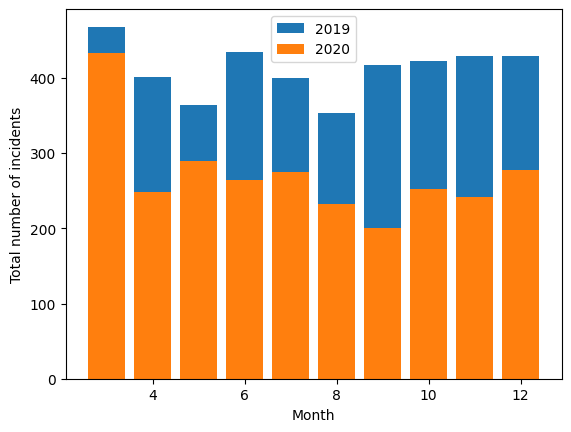

In [21]:
# For 2019
inc = incidents2019.groupby("Mois calendrier").count()
plt.bar(inc.index, inc['duration'], label='2019')
# For 2020
inc = incidents2020.groupby("Mois calendrier").count()
plt.bar(inc.index, inc['duration'], label='2020')

# Add axis labels and legend
plt.xlabel('Month')
plt.ylabel("Total number of incidents")
plt.legend()
plt.show()

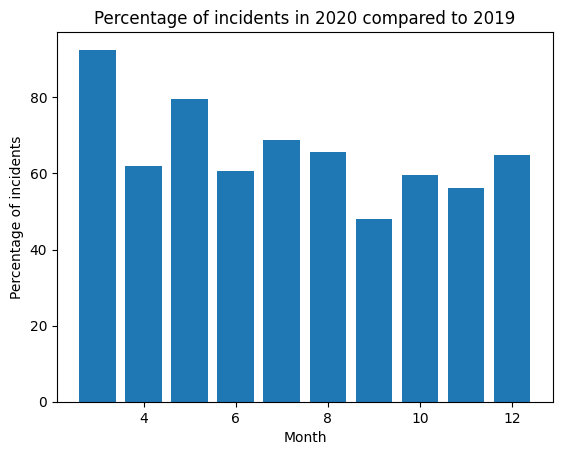

In [22]:
# Same but in relative decrease
inc2019 = incidents2019.groupby("Mois calendrier").count()
inc2020 = incidents2020.groupby("Mois calendrier").count()
incRel = inc2020 / inc2019 * 100

plt.bar(incRel.index, incRel['duration'])
plt.xlabel('Month')
plt.ylabel("Percentage of incidents")
plt.title("Percentage of incidents in 2020 compared to 2019")
plt.show()

Note: restrictions started March 12 - 2020

### Incidents per metro line

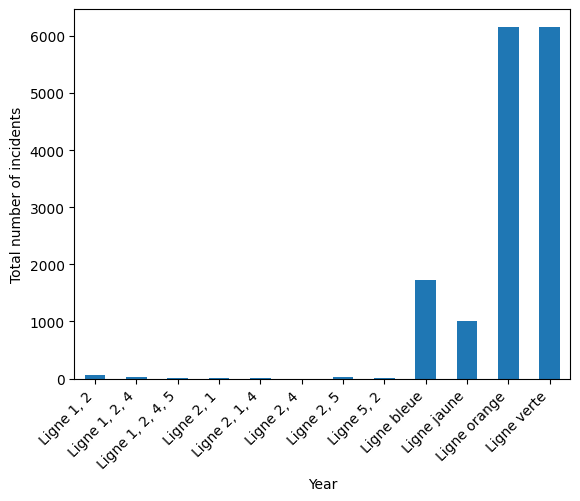

In [23]:
incidents = df.groupby(["Ligne"]).count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel("Total number of incidents")
plt.xticks(rotation=45, ha='right')
plt.show()

Some incidents did affect multiple lines. This makes our graph difficult to read and interpret.<br>
We will construct another dataFrame in which incidents affecting multiple lines are duplicated.<br>
For example, from an incident labeled `Ligne 1,2` we create two identical incidents labeled `Ligne verte` and `Ligne orange`.

We start by creating a dataFrame which contains only incidents attributed to a single ligne. <br>
For this we filter our dataset and create a new one with the `dataFrame` method [`copy()`](https://pandas.pydata.org/docs/reference/api/pandas.dataFrame.copy.html).

In [24]:
df1 = df[(df.Ligne == 'Ligne orange') | (df.Ligne == 'Ligne verte') | (df.Ligne == 'Ligne bleue') | (df.Ligne == 'Ligne jaune')].copy()

Next we search for incidents which affected multiple lines and filter them by a specific line.<br>
For example, incidents which affected the orange line will have an entry in the `Ligne` field with contains the character `1`.<br>
We can search dataFrames for fields containing specific sub-strings like this:

In [25]:
# These incidents are related to 'Ligne orange'
df[df.Ligne.str.contains("1")]

,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
8921,Clientèle,Méfait volontaire,Clientèle,"Ligne 1, 2",17.700000,17.733333,#,#,Non affecté,LG12,0,0,0,0,2020,1,2,4,2.0
9151,Clientèle,Méfait volontaire,Clientèle,"Ligne 1, 2, 4",20.250000,20.250000,#,#,Non affecté,B124,0,0,0,0,2021,10,2,6,0.0
9274,Clientèle,Méfait volontaire,Clientèle,"Ligne 2, 1",22.316667,22.316667,#,#,Non affecté,BR21,0,0,0,0,2020,3,3,2,0.0
9349,Clientèle,Méfait volontaire,Clientèle,"Ligne 1, 2, 4",18.150000,18.150000,#,#,Non affecté,B124,0,0,0,0,2019,6,3,1,0.0
9449,Clientèle,Méfait volontaire,Clientèle,"Ligne 1, 2",16.183333,16.183333,#,#,Non affecté,LG12,0,0,0,0,2020,10,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,Autres,Causes externes,"Feu, fumée, odeur, produit, etc...","Ligne 1, 2, 4",17.616667,18.133333,#,#,Non affecté,L124,0,0,0,1,2021,7,25,7,31.0
24376,Clientèle,Méfait volontaire,"Feu, fumée, odeur, produit, etc...","Ligne 1, 2, 4",13.166667,13.716667,#,#,Non affecté,B124,0,0,0,1,2019,3,26,2,33.0
24389,Équipements fixes,Service aux stations,"Feu, fumée, odeur, produit, etc...","Ligne 1, 2",6.016667,6.816667,#,#,Non affecté,L12,0,0,0,1,2019,10,27,7,48.0
24408,Matériel roulant,MPM-10,"Feu, fumée, odeur, produit, etc...","Ligne 1, 2, 4, 5",15.933333,16.466667,10208,#,10,9999,0,0,0,1,2019,6,29,6,32.0


We want that these incidents are all attributed to the orange line. For this we fill the `Ligne` field with `Ligne orange` for all of them (using the `dataFrame` method [`assign()`](https://pandas.pydata.org/docs/reference/api/pandas.dataFrame.assign.html):

In [26]:
df_orange = df[df.Ligne.str.contains("1")]
df_orange = df_orange.assign(Ligne='Ligne orange')
df_orange.head()

,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
8921,Clientèle,Méfait volontaire,Clientèle,Ligne orange,17.700000,17.733333,#,#,Non affecté,LG12,0,0,0,0,2020,1,2,4,2.0
9151,Clientèle,Méfait volontaire,Clientèle,Ligne orange,20.250000,20.250000,#,#,Non affecté,B124,0,0,0,0,2021,10,2,6,0.0
9274,Clientèle,Méfait volontaire,Clientèle,Ligne orange,22.316667,22.316667,#,#,Non affecté,BR21,0,0,0,0,2020,3,3,2,0.0
9349,Clientèle,Méfait volontaire,Clientèle,Ligne orange,18.150000,18.150000,#,#,Non affecté,B124,0,0,0,0,2019,6,3,1,0.0
9449,Clientèle,Méfait volontaire,Clientèle,Ligne orange,16.183333,16.183333,#,#,Non affecté,LG12,0,0,0,0,2020,10,3,6,0.0


We can proceed like this for every of the four lines. Once extracted, these incidents are added to our dataFrame `df1` using the [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) method.

In [27]:
# Orange line
df_orange = df[df.Ligne.str.contains("1")]
df_orange = df_orange.assign(Ligne='Ligne orange')
df1 = pd.concat([df1, df_orange])

# Green line
df_green = df[df.Ligne.str.contains("2")]
df_green = df_green.assign(Ligne='Ligne verte')
df1 = pd.concat([df1, df_green])

# Blue line *** Line number is 4 and not 3 as one may expect ***
df_blue = df[df.Ligne.str.contains("4")]
df_blue = df_blue.assign(Ligne='Ligne bleue')
df1 = pd.concat([df1, df_blue])

# Yellow line *** Line number is 5 and not 4 as one may expect ***
df_yellow = df[df.Ligne.str.contains("5")]
df_yellow = df_yellow.assign(Ligne='Ligne jaune')
df1 = pd.concat([df1, df_yellow])

We can now plot again our data

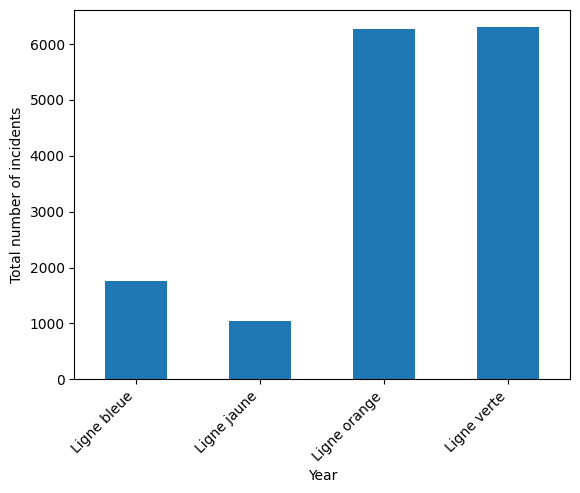

In [28]:
incidents = df1.groupby(["Ligne"]).count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel("Total number of incidents")
plt.xticks(rotation=45,  ha='right')
plt.show()

In [29]:
# We can get the explicit numbers too
incidents

Ligne
Ligne bleue     1767
Ligne jaune     1043
Ligne orange    6273
Ligne verte     6294
Name: duration, dtype: int64

A pie chart would be a better choice here
- To create a pie chart we use the [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) method form [`MatPlotLib`](https://matplotlib.org/stable/index.html)
- The labels to be used for the pie chart have to be extracted from our `dataFrame` using the [`index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index) attribute.
- Percentage values can be added to the pie chart using the `autopct` option (for example `autopct='%1.0f%%'`)

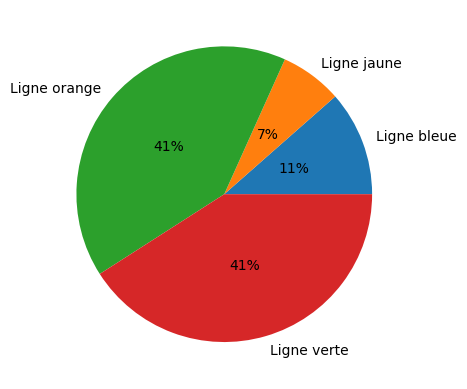

In [30]:
# color codes for the metro lines
plt.pie(incidents, labels=incidents.index, autopct='%1.0f%%', pctdistance=0.5)
plt.show()

Below we show how we can further apply to each metro line its color.<br>
The option `color` from the `pie` method allows to choose the colors. The colors must be given in the same order as the `labels`.<br>
To create these colors, we use the [`vectorize()`](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) method from [`numpy`](https://numpy.org/doc/stable/index.html). This method applies a function to each element of the array.<br>
The function we apply is the [`get()`](https://www.w3schools.com/python/ref_dictionary_get.asp) method from Python [`dictionaries`](https://www.w3schools.com/python/python_dictionaries.asp).

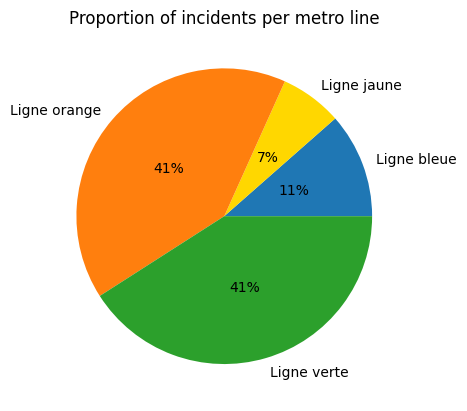

In [31]:
# color codes for the metro lines
colors =  {
        "Ligne jaune": '#FFD700',
        "Ligne bleue": 'tab:blue',
        "Ligne orange": 'tab:orange',
        "Ligne verte": 'tab:green'
    }

# apply to each entry of the array incidents.index the dictionnary colors
col = np.vectorize(colors.get)(incidents.index)

# plot the pir chart
plt.pie(incidents, labels=incidents.index, colors=col, autopct='%1.0f%%', pctdistance=0.5)
plt.title("Proportion of incidents per metro line")
plt.show()

Not all lines have the same number of passengers or metro stations. We do not know the number of passengers per line. But we can know the number of metro stations on each line. <br>
Below we compute the number of metro stations which had any incident (in the full dataset) in the metro line and use this to normalize our total number of incidents.

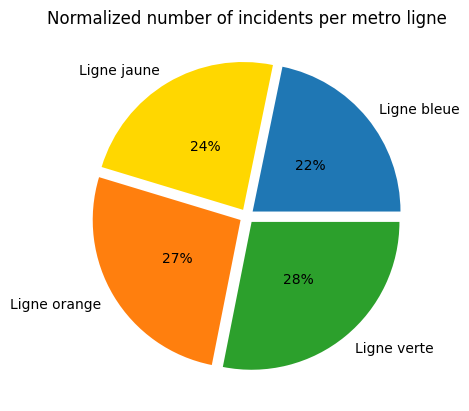

In [32]:
incidents = df1.groupby(["Ligne"]).count()['duration']
metro_stations = df1.groupby(["Ligne"])['Code de lieu'].unique()
nbr = np.vectorize(len)(metro_stations)

# color codes fro the metro lines
colors =  {
        "Ligne jaune": '#FFD700',
        "Ligne bleue": 'tab:blue',
        "Ligne orange": 'tab:orange',
        "Ligne verte": 'tab:green'
    }

# apply to each entry of the array incidents.index the dictionnary colors
col = np.vectorize(colors.get)(incidents.index)

# plot the pir chart
plt.pie(incidents/nbr, labels=incidents.index, colors=col, autopct='%1.0f%%', pctdistance=0.5, explode=[0.05, 0.05, 0.05, 0.05])
plt.title("Normalized number of incidents per metro line")
plt.show()

#### Evolution of incidents over the years on the metro lines

In [33]:
# Number of incidents for each line over the years
incidents = df1.groupby(["Ligne", "Année civile"]).count()['duration']
incidents

Ligne         Année civile
Ligne bleue   2019             607
              2020             431
              2021             344
              2022             385
Ligne jaune   2019             381
              2020             217
              2021             197
              2022             248
Ligne orange  2019            2065
              2020            1458
              2021            1475
              2022            1275
Ligne verte   2019            1937
              2020            1497
              2021            1450
              2022            1410
Name: duration, dtype: int64

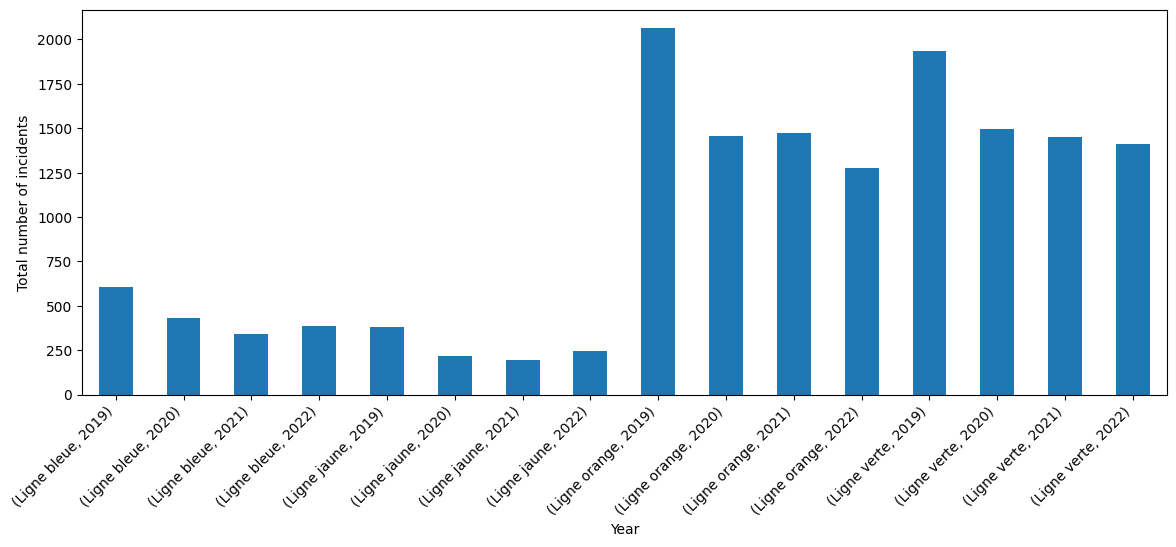

In [34]:
# A graphical representation
incidents.plot(kind='bar', figsize=(14,5))
plt.xlabel('Year')
plt.ylabel("Total number of incidents")
plt.xticks(rotation=45,  ha='right')
plt.show()

#### Incidents on the orange line

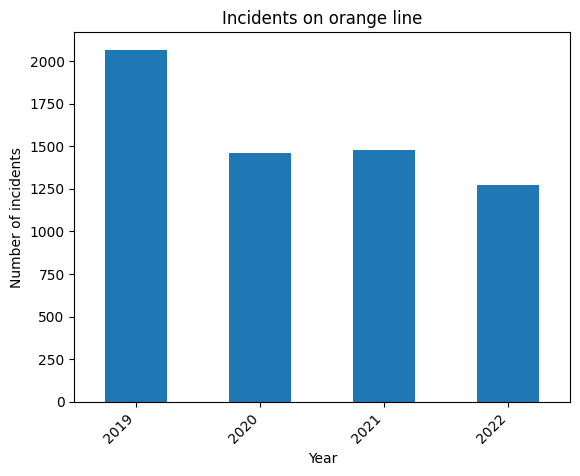

In [35]:
# Incidents on the orange line over the years
incidents = df1[df1["Ligne"]=="Ligne orange"].groupby("Année civile").count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel("Number of incidents")
plt.xticks(rotation=45,  ha='right')
plt.title("Incidents on orange line")
plt.show()

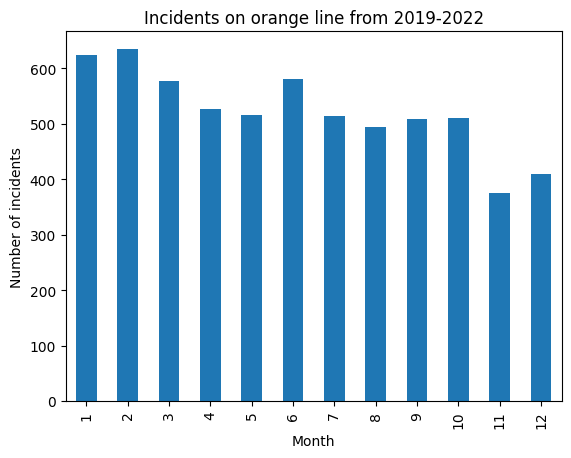

In [36]:
# Incidents on the orange line on a monthly base
incidents = df1[df1["Ligne"]=="Ligne orange"].groupby("Mois calendrier").count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel("Number of incidents")
plt.title("Incidents on orange line from 2019-2022")
plt.show()

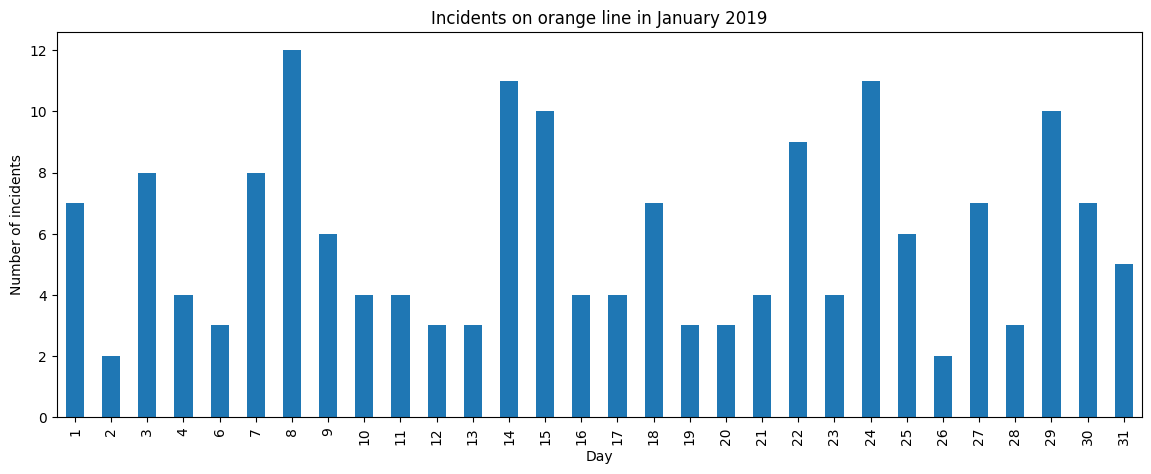

In [37]:
# Incidents on the orange line in January 2019
incidents = df1[(df1["Ligne"] == "Ligne orange") & (df1["Mois calendrier"] == 1) & (df1["Année civile"] == 2019)].groupby("Jour du mois").count()['duration']
incidents.plot(kind='bar', figsize=(14,5))
plt.xlabel('Day')
plt.ylabel("Number of incidents")
plt.title("Incidents on orange line in January 2019")
plt.show()

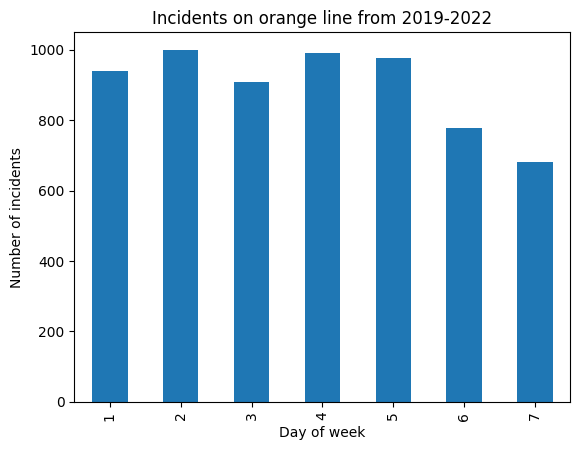

In [38]:
# Incidents on the orange line in function of the fay of the week
incidents = df1[df1["Ligne"]=="Ligne orange"].groupby("Jour de la semaine").count()['duration']
incidents.plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel("Number of incidents")
plt.title("Incidents on orange line from 2019-2022")
plt.show()

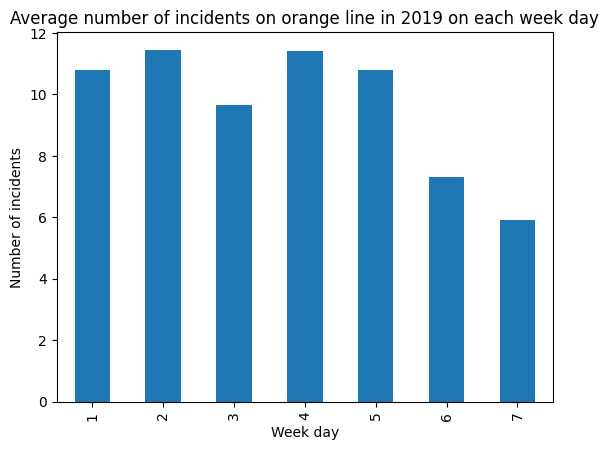

In [39]:
# Average number of incidents on orange line in 2019 on each week day
incidents = df1[(df1["Ligne"] == "Ligne orange") & (df1["Année civile"] == 2019)].groupby(["Jour de la semaine", "Jour du mois"]).count().groupby("Jour de la semaine").mean()
incidents['duration'].plot(kind='bar')
plt.xlabel('Week day')
plt.ylabel("Number of incidents")
plt.title("Average number of incidents on orange line in 2019 on each week day")
plt.show()

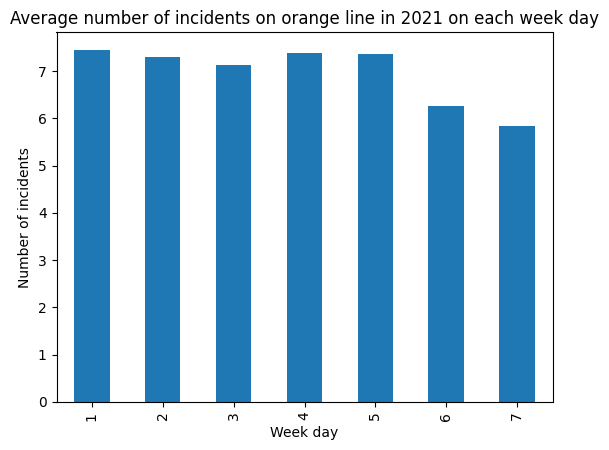

In [40]:
# Average number of incidents on orange line in 2021 on each week day
incidents = df1[(df1["Ligne"] == "Ligne orange") & (df1["Année civile"] == 2021)].groupby(["Jour de la semaine", "Jour du mois"]).count().groupby("Jour de la semaine").mean()
incidents['duration'].plot(kind='bar')
plt.xlabel('Week day')
plt.ylabel("Number of incidents")
plt.title("Average number of incidents on orange line in 2021 on each week day")
plt.show()

## Key metrics

### Average number of daily incidents on each weekday in a year

In [41]:
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def average_number_daily_incidents_year(year):
    """
    Average number of incidents on each week day for a given year
    """
    # count number of incidents per line, weekday and day of month
    inc = df1[(df1["Année civile"] == year)].groupby(["Ligne", "Jour de la semaine", "Jour du mois"]).count()
    # compute mean (each week day will have 31 entries)
    inc = inc.groupby(["Ligne", "Jour de la semaine"]).mean()

    weekdays = np.sort(df1["Jour de la semaine"].unique())
    width = np.min(np.diff(weekdays))/5
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    jaune = inc.loc[('Ligne jaune', slice(None)), :]['duration']
    bleue = inc.loc[('Ligne bleue', slice(None)), :]['duration']
    orange = inc.loc[('Ligne orange', slice(None)), :]['duration']
    verte = inc.loc[('Ligne verte', slice(None)), :]['duration']

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.bar(weekdays - 2*width, jaune, width, color='#FFD700', label='Ligne jaune', align='edge')
    ax.bar(weekdays - 1*width, bleue, width, color='tab:blue', label='Ligne bleue', align='edge')
    ax.bar(weekdays + 0*width, orange, width, color='tab:orange', label='Ligne orange', align='edge')
    ax.bar(weekdays + 1*width, verte, width, color='tab:green', label='Ligne verte', align='edge')

    plt.ylabel("Number of daily incidents")
    plt.title("Average number of daily incidents in "+ str(year) + " on each week day")
    plt.xticks(ticks=weekdays, labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

### Average number of daily incidents on each weekday for a line

In [42]:
@interact(metro_ligne=widgets.Dropdown(options=['Ligne jaune', 'Ligne bleue', 'Ligne orange', 'Ligne verte'],
                                       description='Year'))
def average_number_daily_incidents_line(metro_ligne):
    """
    Average number of incidents on each week day for a given metro ligne
    """
    # count number of incidents per line, weekday and day of month
    inc = df1.groupby(["Année civile", "Ligne", "Jour de la semaine", "Jour du mois"]).count()
    # compute mean (each week day will have 31 entries)
    inc = inc.groupby(["Année civile", "Ligne", "Jour de la semaine"]).mean()

    weekdays = np.sort(df1["Jour de la semaine"].unique())
    width = np.min(np.diff(weekdays))/5
    inc2019 = inc.loc[(2019, metro_ligne, slice(None)), :]['duration']
    inc2020 = inc.loc[(2020, metro_ligne, slice(None)), :]['duration']
    inc2021 = inc.loc[(2021, metro_ligne, slice(None)), :]['duration']
    inc2022 = inc.loc[(2022, metro_ligne, slice(None)), :]['duration']

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    colors =  {
        "Ligne jaune": '#FFD700',
        "Ligne bleue": 'tab:blue',
        "Ligne orange": 'tab:orange',
        "Ligne verte": 'tab:green'
    }
    c = colors[metro_ligne]
    ax.bar(weekdays - 2*width, inc2019, width, label='2019', align='edge', color=c, alpha=0.55, edgecolor=c)
    ax.bar(weekdays - 1*width, inc2020, width, label='2020', align='edge', color=c, alpha=0.70, edgecolor=c)
    ax.bar(weekdays - 0*width, inc2021, width, label='2021', align='edge', color=c, alpha=0.85, edgecolor=c)
    ax.bar(weekdays + 1*width, inc2022, width, label='2022', align='edge', color=c, alpha=1.00, edgecolor=c)

    plt.ylabel("Number of daily incidents")
    plt.title("Average number of daily incidents on "+ str(metro_ligne))
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Year', options=('Ligne jaune', 'Ligne bleue', 'Ligne orange', 'Lig…

### Average duration of daily incidents on each weekday in a year

In [43]:
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def average_duration_daily_incidents_year(year):
    """
    Average number of incidents on each week day for a given year
    """
    inc = df1[(df1["Année civile"] == year)].groupby(["Ligne", "Jour de la semaine"])['duration'].mean()

    weekdays = np.sort(df1["Jour de la semaine"].unique())
    width = np.min(np.diff(weekdays))/5
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    jaune = inc.loc['Ligne jaune', :]
    bleue = inc.loc['Ligne bleue', :]
    orange = inc.loc['Ligne orange', :]
    verte = inc.loc['Ligne verte', :]

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.bar(weekdays - 2*width, jaune, width, color='#FFD700', label='Ligne jaune', align='edge')
    ax.bar(weekdays - 1*width, bleue, width, color='tab:blue', label='Ligne bleue', align='edge')
    ax.bar(weekdays + 0*width, orange, width, color='tab:orange', label='Ligne orange', align='edge')
    ax.bar(weekdays + 1*width, verte, width, color='tab:green', label='Ligne verte', align='edge')

    plt.ylabel("Duration of incidents [Minutes]")
    plt.title("Average duration of incidents in "+ str(year))
    plt.xticks(ticks=weekdays, labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

In [44]:
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def average_number_daily_incidents_year(year):
    """
    Average number of incidents on each week day for a given year
    """
    # count number of incidents per ligne, weekday and day of month
    inc = df1[(df1["Année civile"] == year)].groupby(["Ligne", "Jour de la semaine", "Jour du mois"])['duration'].sum()
    # compute mean (each week day will have ~31 entries)
    inc = inc.groupby(["Ligne", "Jour de la semaine"]).mean()

    weekdays = np.sort(df1["Jour de la semaine"].unique())
    width = np.min(np.diff(weekdays))/5
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    jaune = inc.loc['Ligne jaune', :]
    bleue = inc.loc['Ligne bleue', :]
    orange = inc.loc['Ligne orange', :]
    verte = inc.loc['Ligne verte', :]

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.bar(weekdays - 2*width, jaune, width, color='#FFD700', label='Ligne jaune', align='edge')
    ax.bar(weekdays - 1*width, bleue, width, color='tab:blue', label='Ligne bleue', align='edge')
    ax.bar(weekdays + 0*width, orange, width, color='tab:orange', label='Ligne orange', align='edge')
    ax.bar(weekdays + 1*width, verte, width, color='tab:green', label='Ligne verte', align='edge')

    plt.ylabel("Total daily interruption time (minutes)")
    plt.title("Average total daily interuption time in "+ str(year))
    plt.xticks(ticks=weekdays, labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…